# **Lab 4**

- Eileen Garcia: 48241821
- Trevor  Dohm: 48376059
- Reece Iriye: 48255107

## **0: Imports** 

In [3]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler

In [4]:
# Print Version
print("Pandas:", pd.__version__)
print("Numpy:", np.__version__)

Pandas: 2.0.3
Numpy: 1.25.2


## **1: Load, Split, Balance**



### **1.1: Loading Data In and Seeing Basic Characteristcs**

(1) Load the data into memory and save it to a pandas data frame. 
DO NOT normalize or one-hot encode any of the features until asked to do so later in the rubric. 

In [6]:
df_original_csv: pd.DataFrame = pd.read_csv("Dataset/acs2017_census_tract_data.csv")
df_original_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TractId           74001 non-null  int64  
 1   State             74001 non-null  object 
 2   County            74001 non-null  object 
 3   TotalPop          74001 non-null  int64  
 4   Men               74001 non-null  int64  
 5   Women             74001 non-null  int64  
 6   Hispanic          73305 non-null  float64
 7   White             73305 non-null  float64
 8   Black             73305 non-null  float64
 9   Native            73305 non-null  float64
 10  Asian             73305 non-null  float64
 11  Pacific           73305 non-null  float64
 12  VotingAgeCitizen  74001 non-null  int64  
 13  Income            72885 non-null  float64
 14  IncomeErr         72885 non-null  float64
 15  IncomePerCap      73256 non-null  float64
 16  IncomePerCapErr   73256 non-null  float6

In [7]:
# Dataset Size
row_count, col_count = df_original_csv.shape
print(f"The dataset contains {row_count} rows and {col_count} columns.")

The dataset contains 74001 rows and 37 columns.


### **1.2: Remove Observations That Have Missing Data**

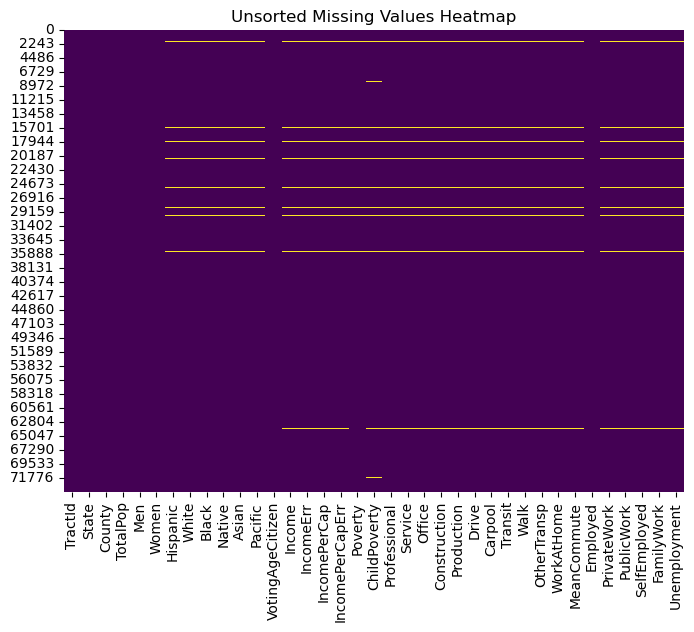

In [8]:
# Exploring Missing Data - ChatGPT 
# Create a boolean DataFrame where True indicates missing values

missing_values = df_original_csv.isnull()

plt.figure(figsize=(8,6))
sns.heatmap(missing_values, cmap='viridis', cbar=False)
plt.title('Unsorted Missing Values Heatmap')
plt.show()

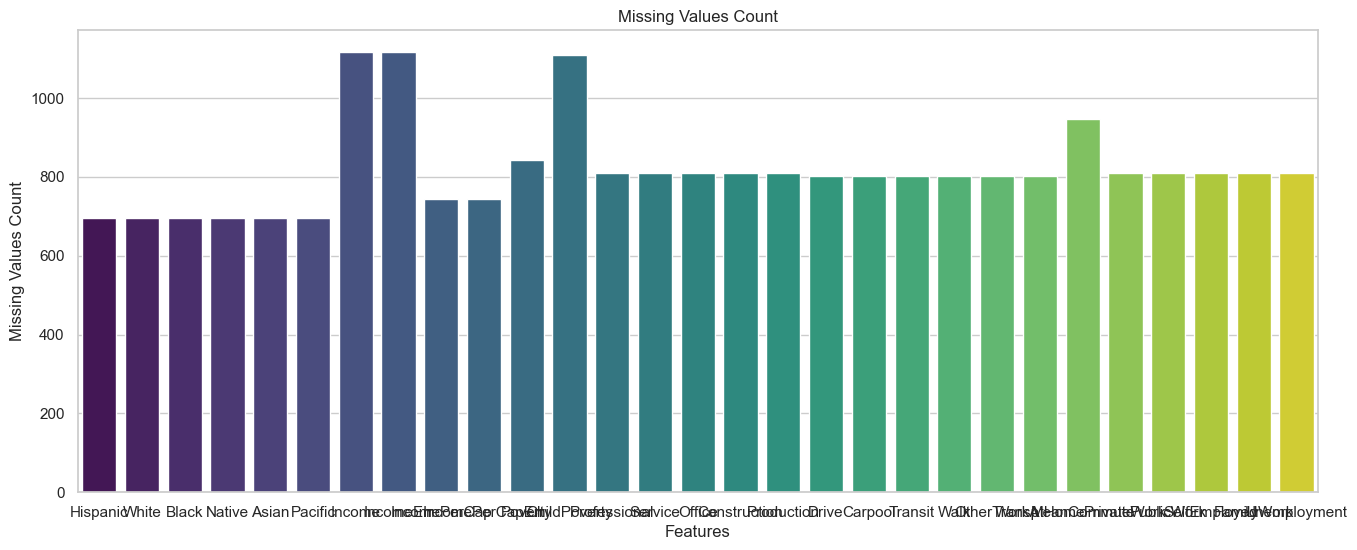

In [10]:
# Bar Plot of Missing Values

# Find Missing Values (Sort)
missCount = df_original_csv.isnull().sum()[df_original_csv.isnull().sum() > 0]
sns.set(style = "whitegrid")
plt.figure(figsize = (16, 6))
sns.barplot(x = missCount.index, y = missCount.values, palette = "viridis")
plt.title('Missing Values Count')
plt.xlabel('Features')
plt.ylabel('Missing Values Count')
plt.show()

In [11]:
# Remove observations with missing data
df_modified = df_original_csv.dropna(inplace=False)

# Dataset Size - reduced by 1283 instances
row_count, col_count = df_modified.shape
print(f"The dataset contains {row_count} rows and {col_count} columns.")

The dataset contains 72718 rows and 37 columns.


### **1.3: Encode any string data as integers**

In [12]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Iterate over the columns and encode those with string data
for column in df_modified.columns:
    if df_modified[column].dtype == 'object':
        df_modified[column] = label_encoder.fit_transform(df_modified[column])

df_modified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72718 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TractId           72718 non-null  int64  
 1   State             72718 non-null  int32  
 2   County            72718 non-null  int32  
 3   TotalPop          72718 non-null  int64  
 4   Men               72718 non-null  int64  
 5   Women             72718 non-null  int64  
 6   Hispanic          72718 non-null  float64
 7   White             72718 non-null  float64
 8   Black             72718 non-null  float64
 9   Native            72718 non-null  float64
 10  Asian             72718 non-null  float64
 11  Pacific           72718 non-null  float64
 12  VotingAgeCitizen  72718 non-null  int64  
 13  Income            72718 non-null  float64
 14  IncomeErr         72718 non-null  float64
 15  IncomePerCap      72718 non-null  float64
 16  IncomePerCapErr   72718 non-null  float64
 17

### **1.4: Keep/Remove the "County" variable**
Explain why you decided to keep or remove the variable.

In [13]:
# Delete "county" variable
df_modified.drop('County', axis=1, inplace=True)

### **1.5: Training and Testing Split**
Assume you are equally interested in the classification performance for each class in the dataset. Split the dataset into 80% for training and 20% for testing. There is no need to split the data multiple times for this lab.

In [16]:
from sklearn.model_selection import train_test_split

X = df_modified.drop('ChildPoverty', axis=1)  # Exclude target variable
y = df_modified['ChildPoverty']  # Use target variable as the target

# We are not stratifying yet, due to the unbalanced nature of the 'ChildPoverty' values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### **1.6: Balance the Dataset**
Balance the dataset so that about the same number of instances are within each class. Choose a method for balancing the dataset and explain your reasoning for selecting this method. One option is to choose quantization thresholds for the "ChildPoverty" variable that equally divide the data into four classes. Should balancing of the dataset be done for both the training and testing set? Explain.

Balancing the dataset is important when dealing with classification problems because an imbalanced dataset can bias the model towards the majority classes. This dataset was balanced by quantizing the "ChildPoverty" variable into 4 classes to ensure that each class has a roughly equal number of instances. This ensures that the model is more robust and less biased. 

In [32]:
# Balance the training dataset using quantization thresholds
y_train_quantized = pd.qcut(y_train, q=4, labels=[0, 1, 2, 3])

# Stratify now that 'ChildPovery' in the training set has been quantized
X_train, X_val, y_train_quantized, y_val_quantized = train_test_split(X_train, y_train_quantized, test_size=0.2, random_state=42, stratify=y_train_quantized)

# Now, use X_train and y_train_quantized for training, and X_test and y_test for testing.

At the end of splitting and balancing, we have a few different sets. 
- `X_train` and `y_train_quantized` are the input features and target values, the quantized version of child poverty rates, for the training dataset. 
-  `X_val` and `y_val_quantized` are the validation set that can be used for hyperparameter tuning. Using a separate validation set that is different than the training and test datasets allows us to check if the model is overfitting to the training data. If the model performs well on the training set but performs poorly on the validation set, then the model could be overfitting. 
- `X_test` and `y_test` make up the test dataset. Evaluating the model on the test set provides an unbiased estimate of the model's performance on unseen data. It also offers a realistic estimate of how the model might perform in read-world scenarios with unseen data. 